OLS assumptions

Previous week, we learnt a fair deal about linear regressions. We talked about:

- Difference between correlation and causation
- Simple linear regression model
- Multiple linear regression model
- Decomposition of variability - SST, SSR and SSE
- Ordinary Least Squares
- R-squared and adjusted R-squared
- Feature selection using F-test

Great! It's now time to understand assumptions behind regressions.

We will talk about four key assumptions. It is important to understand all of them and consider them before you perform a regression analysis.

- The first assumption we will talk about is linearity.


As we saw in the previous lecture, a linear regression is the simplest non-trivial relationship. Of course there are more complicated regressions, such as the generalized least squares, bayesian regression and so on. This assumption though relates to linear regressions.

The first step before we start performing regressions is to verify if the relationship between the dependent variable and the independent variable is linear. The easiest way to do this is to choose an independent variable, say x1 and plot it against the dependent variable y on a scatterplot.

If the data points form a pattern that looks like a straight line, then a linear regression model is appropriate to be applied. 

Now, what if by plotting a variable x2 against y, we dont see a pattern that looks like a straight line, but rather looks like a curved line? Using a linear regression would not be appropriate in this case directly. However, there is a way to fix this situation. We can transform the variables appropriately. For instance, if we had a relationship that looks like a quadratic curve, we can transform x2 to its square value, and then obtain a linear relationship between y and (x2)-square.

The takeaway is that if the relationship is nonlinear, you should not use the data directly. You should transform it appropriately and then proceed with linear regression models.


- Nice! Our second assumption is called homoscedasticity.

Homoscedasticity means to have equal variance. In particular, here we are saying that the error term should have equal variance, one with the other.

We can make this clear by looking at two plots. The plot on the left has equal variance for the error terms and hence is homoscedastic, while the plot on the right does not have equal variance and hence is not homoscedastic. It is instead called heteroscedastic.

For the plot on the right, the regression line would imply that for smaller values of the independent variables we would have a better prediction, for bigger values we would have a poorer prediction. We don't like such uncertainties in linear regression and hence would like to avoid them.

So, how can we circumvent heteroscedasticity?

First, we can look for outliers and try to remove them.

Second, we can consider the log transformation. Let's understand this by taking a simple example. Here we see a scatterplot y vs. x1. We can clearly recognize heteroscedasticity here. As x1 grows, the variability in y also increases. Now, let's take the natural logarithm of y and plot log y vs. x1. This is called a semilog plot. We see that the heteroscedasticity we observed before transformation is now gone! This is thus a good material for linear regression. Similarly, we can encounter cases where we would need to take log x1 instead of log y, or we would need to take log y as well as log x1, the so called log-log plot. So, the take away message here is that, using a log transformation, we can overcome heteroscedasticity in many cases.


- Good! Our third assumption is no autocorrelation.

This means that the error terms (or the residuals) are assumed to be uncorrelated. Mathematically, we can write this as:


Autocorrelation is usually violated in time series data. For example, if you are looking at the productivity of a general individual on a daily basis, you might observe that the productivity peaks on Mondays and Tuesdays, and gradually drops by Friday, and then again peaks the next Monday and so on. A reason for this that an individual is well rested on the weekends and hence performs well on Mondays, while the same individual could be tired by Friday and is hence less productive. So, we start observing patterns in the data, and the error terms are no longer uncorrelated.

There are no straightforward fixes to this assumption. The only thing you can do is avoid using a linear regression in such a setting.

Instead, there are other types of regressions that deal with time series data. It is possible to use an auto regressive model, a moving average model or even an auto regressive moving average model to deal with time series data.

- We come to our last assumption, that is no multicollinearity.

We observe multicollinearity when two or more variables have a high degree of correlation. We have seen how to compute the correlation coefficient previously. Mathematically, muticollinearity is represented as:

To understand this, let's take an example. Let's say we are looking at the health of an infant against two variables age and weight. With infants, it is generally observed that as the age increases, the weight increases as well, thus making these two variables highly positively correlated. Using both these variables in the model could mess up the coefficients and result in wrong p-values in F regression and so on. Therefore, it is recommended to fix this issue before proceeding with regression.

So, how do we check for multicollinearity? Statisticians have developed a measure called Variance Inflation Factor (or VIF), which is one of the best ways to check for multicollinearity.

VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is compared to a situation where the variable was completely uncorrelated with the other predictors. You will see that, in order to use this measure in practice, we shall rely on a library called statsmodel where the VIF method is directly available for us.

VIF values can range from 1 to +infinity. When VHF is 1, it means that there is no multicollinearity at all. Generally values between 1 and 5 are considered perfectly OK. Here's where it becomes tricky. Some sources state that a VHF above 5 is unacceptable. Others put the boundary at 6 and some others put the boundary at even 10! Unfortunately there is no firm consensus on the topic. Therefore, this cutoff more or less depends on the context and personal choice.

There are three types of fixes.

The first one is to drop one of the two variables.

The second is to transform them into one variable.

The third possibility is to keep the variables in the model, but handle them with caution. This is because Multicollinearity affects certain aspects of the model, while some others are unaffected. This is usually done by skilled data scientists. Here is a nice article I encourage you to read about multicollinearity: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/

Ok, that's about it for our lecture on assumptions in linear regression. Let's now look at an example where these assumptions are put to practice!

Let's assume that you are working for a second-hand car sale company. They have gathered information from several customers about their car specifications including the price of the car they wish to avail. The primary goal for you is to predict the price of a car given these attributes. Let's go ahead and look at the data set in our notebook directly.

## Import the relevant libraries

As usual, before we get to data, the first steps are to import the relevant libraries. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Load the data

Now, I'll load the dataset in the variable data and print out a few lines of the dataset. (pause)

OK, here's our data set.

This is a list of second hand cars containing specifications such as the brand, price of the car, mileage, engine volume and the year of registration. To recap, our goal is to predict the price of a used car depending on its specifications.

Now, brand is a potential feature because we know that certain brands are more expensive than the others.

The second relevant variable is mileage, since the more a car is driven the cheaper it should be.

The third potential feature is the engine volume. Generally, we expect the larger the engine volume, the more expensive a car is.

The final variable is year of production. The older the car the cheaper it is generally. Of course, there are some vintage cars that can be an exception to this trend.

Note that brand is the only categorical variable here, while the others are numerical variables.

In [3]:
data = pd.read_excel('car_sale.xlsx')
data.head()

,Brand,Price,Mileage,EngineV,Year
0,BMW,4200.0,277,2.0,1991
1,Mercedes-Benz,7900.0,427,2.9,1999
2,Mercedes-Benz,13300.0,358,5.0,2003
3,Audi,23000.0,240,4.2,2007
4,Toyota,18300.0,120,2.0,2011


## Explore the descriptive statistics

So, let's explore the descriptive statistics now. We see that there are no missing values. Further, the values seem within expected ranges, so no need to do a thorough outlier analysis here. 

In [4]:
data.describe(include='all')

,Brand,Price,Mileage,EngineV,Year
count,3867,3867.000000,3867.000000,3867.000000,3867.000000
unique,7,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,NaN,NaN,NaN
freq,848,NaN,NaN,NaN,NaN
mean,NaN,18194.455679,160.542539,2.450440,2006.709853
std,NaN,19085.855165,95.633291,0.949366,6.103870
min,NaN,800.000000,0.000000,0.600000,1988.000000
25%,NaN,7200.000000,91.000000,1.800000,2003.000000
50%,NaN,11700.000000,157.000000,2.200000,2008.000000
75%,NaN,21700.000000,225.000000,3.000000,2012.000000


## Check the OLS assumptions

Ok, in the previous lectures, we basically went ahead with regression without checking for the ordinary least square method assumptions. That's ok because we learnt the mechanics of how linear regression models are built. However, in reality, before one goes ahead and builds a linear regression model, we need to make sure we are not violating the assumptions we studied. That's the task we will do right now.

So, here we have a new section called "Check the OLS assumptions".

The first assumption we want to check is if the plots of the dependent variable vs the independent variables are linear, so that a linear regression model could be applied. To do so, let's plot the relevant scatter plots amongst the numerical variables. 

We shall first create three subplots using this line of code. (pause) Let us then plot a scatter plot Price vs. Mileage. This can be done by writing: ax1.scatter(data['Year'],data['Price']). Let us also set a title for this plot. (pause)

We can go ahead and repeat the scatterplots for Price vs. Engine volume (pause), and Price vs. Mileage. (pause). Let's now visualize these plots.

We can see that there are patterns here, but they are not linear. Therefore, we should not run a linear regression immediately. We should first transform one or more variables, and make them eligibile for linear regression modeling. 

We can see from Prive vs Mileage and Price vs. year plots that the relationship is somewhat exponential. So, let's go ahead and apply a log transformation to the price variable.

### Assumption 1: Linearity

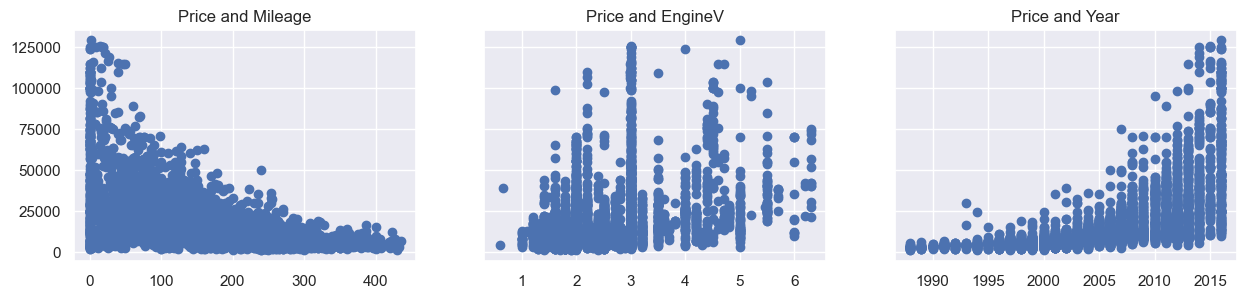

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

ax1.scatter(data['Mileage'],data['Price'])
ax1.set_title('Price and Mileage')

ax2.scatter(data['EngineV'],data['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data['Year'],data['Price'])
ax3.set_title('Price and Year')

plt.show()

Let us create a new variable called log_price, and then use numpy's log method to transform the price variable. We write: 
Now we can create a new column called log_price in the same dataframe and store these values. (pause) Let's see the data. Good! we have a new column called log_price here.

In [6]:
log_price = np.log(data['Price'])
data['log_price'] = log_price
data.head()

,Brand,Price,Mileage,EngineV,Year,log_price
0,BMW,4200.0,277,2.0,1991,8.342840
1,Mercedes-Benz,7900.0,427,2.9,1999,8.974618
2,Mercedes-Benz,13300.0,358,5.0,2003,9.495519
3,Audi,23000.0,240,4.2,2007,10.043249
4,Toyota,18300.0,120,2.0,2011,9.814656


We can now go ahead and replot the scatterplots using the log price variable rather than the price variable. We simply copy paste the code from above and change the variable price to log price. (pause) Great! we can see that the patterns are now more or less linear in all these plots. So, we have seen that the log transformation has helped us and we can now apply linear regression using the log price variable. 

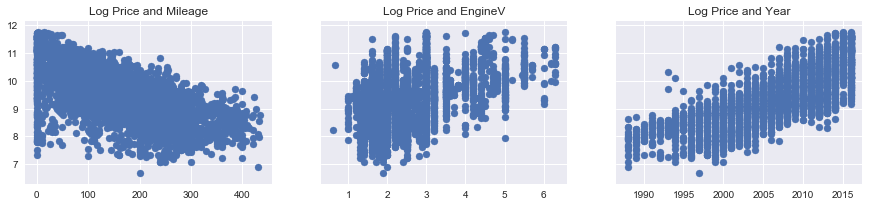

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))

ax1.scatter(data['Mileage'],data['log_price'])
ax1.set_title('Log Price and Mileage')

ax2.scatter(data['EngineV'],data['log_price'])
ax2.set_title('Log Price and EngineV')

ax3.scatter(data['Year'],data['log_price'])
ax3.set_title('Log Price and Year')

plt.show()

We can now simply drop the Price column, it is no longer required.

In [7]:
data = data.drop(['Price'],axis=1)

In [8]:
data.head()

,Brand,Mileage,EngineV,Year,log_price
0,BMW,277,2.0,1991,8.342840
1,Mercedes-Benz,427,2.9,1999,8.974618
2,Mercedes-Benz,358,5.0,2003,9.495519
3,Audi,240,4.2,2007,10.043249
4,Toyota,120,2.0,2011,9.814656


### Assumption 2: Homoscedasticity

Now, we come to our second assumption, that is homoscedasticity. We can see from the above plots that this assumption more or less holds true (pause). The reason for this is that we have already implemented a log transformation, which happens to be a good technique to circumvent the issue of homoscedasticity! So, we don't need to do anything here.

### Assumption 3: Autocorrelation

Once again, we don't need to put in much efforts here since these observations are not coming from time series data. Each of these observations comes randomly from different customers who are willing to sell their cars through the platform. Therefore, there is no reason to worry about the observations to be dependent on each other.

### Assumption 4: Multicollinearity

To check whether this assumption holds, we first look at the correlation matrix. We can do that by writing: data.corr(method=pearson). Good!

Barring the dependent variable, we see that there is a strong correlation between year and Mileage. This makes sense because the older the car, the more distance it would have covered. Therefore we have grounds to expect some degree of multicollinearity in the dataset.

We know that the variance inflation factor or VIF is a great way to check for multicollinearity. In order to avail this method, we use a library called statsmodels. We then import the variance_inflation_factor function from statsmodels by writing:
from statsmodels.stats.outliers_influence import variance_inflation_factor

We can then store the relevant features in a new variable called variables. we write:

we can now create dataframe to visualize vif values. we write:
vif = pd.DataFrame()

Let us now compute the vif values for all the features and store it in a column called VIF. To do so, we write:

Let's write another line of code to store the corresponding feature names. we write:

Now, let's print the vif dataframe. (pause)

Good! we see that we have a column containing vif values and the corresponding features. Recall that we said vif values range from 1 to +infinity. The higher the value of vif, the greater is the degree of multicollinearity, which is not good for linear regression. Also, recall that some statisticians consider vif values above 5 are unacceptable, while others state values above 10 are unacceptable. In real-life cases, it's quite hard for vif values to be strictly below 5, therefore let's choose 10 as the cutoff for this case. Therefore, we see that the Year variable falls in this category and must be removed before performing regression.

So, let's drop the year column from the dataframe. (pause) Good! we now have gone through all the important assumptions and have the following dataset for regression modeling! 


In [9]:
data.corr(method='pearson')

,Mileage,EngineV,Year,log_price
Mileage,1.000000,0.005710,-0.715361,-0.614806
EngineV,0.005710,1.000000,-0.020152,0.411935
Year,-0.715361,-0.020152,1.000000,0.746907
log_price,-0.614806,0.411935,0.746907,1.000000


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Mileage','EngineV','Year']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [11]:
vif

,VIF,features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [12]:
data = data.drop(['Year'],axis=1)

In [13]:
data.head()

,Brand,Mileage,EngineV,log_price
0,BMW,277,2.0,8.342840
1,Mercedes-Benz,427,2.9,8.974618
2,Mercedes-Benz,358,5.0,9.495519
3,Audi,240,4.2,10.043249
4,Toyota,120,2.0,9.814656


## Create dummy variables

Let's look at the dataset, are we ready to apply a regression model? Not yet, we have a column called Brand, that represents categorical data and cannot be simply put in the regression. We need to reframe them appropriately before we can use them in a regression model. In this video, we will talk about how to do this using the concept of dummy variables. The word dummy means an imitation or a copy that stands as a substitute in regression analysis.

A dummy is a variable that is used to include categorical data into a regression model. So far we have seen variables that are numerical in nature, for example, the efficiency, size of the catalyst, the price of a car, mileage, engine volume and the year of registration. We will now explore how to include variables such as the shape of a catalyst, the metal used in the catalyst or in other contexts, variables such as gender and brand into a regression model.

In regression, we can handle the categorical data by replacing the values with zeros and ones. Let's take some examples to see what I mean.

If we had a column called "gender" and it contained two unique values:male and female, we could simply represent males as 0 and females as 1, for example. What if we had a column containing the metal used in the catalyst, and it has four unique values: platinum, gold, silver and copper? How many dummies would we create? 

An extremely important note is that if we have N unique categorical values for a feature, we have to create N-1 dummies. So, in this case, we would create 4-1, that is 3 dummies.

Now, Why is that?

Let's consider the metal column. Gold dummy would be 1 if the metal is gold and zero if it not gold. Similarly, silver dummy would be 1 if the metal is gold and zero if it is not. And similarly for copper. Now, for the first metal, in this case, platinum, we will not create a dummy variable. The reasoning is as follows: if all other dummy variables are zeros, it's clear that the metal is platinum.

If we include a separate variable called platinum dummy, it would be redundant as we are not adding any new information by including this variable. As a consequence, we will introduce multicollinearity to the regression as the platinum dummy would be perfectly determined by the other variables. Therefore, if we have N unique categories there will only be N-1 dummies.

Alright, let's dive straight into our notebook example to see how this is done in practice.

So, we have a new section called "Create dummy variables" to take care of the brand column in our dataset. To know how many unique categories we have in the brand feature, we can simply write: data['Brand'].unique(), and then let's sort them in alphabetical order.

We see that we have 7 unique brands: 'Audi',
 'BMW',
 'Mercedes-Benz',
 'Mitsubishi',
 'Renault',
 'Toyota',
 'Volkswagen' 
 
 This means we need to create 6 dummy variables. 


In [14]:
cat_vals = data['Brand'].unique()
sorted(cat_vals)

['Audi',
 'BMW',
 'Mercedes-Benz',
 'Mitsubishi',
 'Renault',
 'Toyota',
 'Volkswagen']

We can create dummies by using a useful method called get_dummies from the pandas library. This method spots all categorical variables and creates dummies automatically.  OK, let's create a new variable calle:

data_with_dummies = pd.get_dummies(data) and add an additional argument drop first and set it to true. This additional argument will make sure no dummy is created for Audi. Let's see how the new dataframe looks like.

Good, we have successfully encoded all the categories. This is very convenient for us as we only needed one line of code to process all categorical features.

Let's go ahead and check the VIF of this new data frame with encoded categories. (pause).

Nice! we dont see any high values for VIF, so no need to drop any more variables at this stage. So, let's store this data frame in a new variable called data_pp, representing data preprocessed. Good! This completes the section on dummy variables. 

In [19]:
data_with_dummies = pd.get_dummies(data, drop_first=True)

In [20]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,277,2.0,8.342840,1,0,0,0,0,0
1,427,2.9,8.974618,0,1,0,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0
3,240,4.2,10.043249,0,0,0,0,0,0
4,120,2.0,9.814656,0,0,0,0,1,0


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_with_dummies.drop(['log_price'], axis=1)

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [22]:
vif

,VIF,features
0,3.345535,Mileage
1,5.605830,EngineV
2,2.002925,Brand_BMW
3,2.320182,Brand_Mercedes-Benz
4,1.307777,Brand_Mitsubishi
5,1.322344,Brand_Renault
6,1.686401,Brand_Toyota
7,1.803406,Brand_Volkswagen


In [23]:
data_pp = data_with_dummies

## Linear regression model

Let's go ahead and build our regression model. As always, the first step is to declare the inputs and the targets. So, our target is the log_price column, while the inputs are all the columns except the log_price, which we can assign using the drop method.

### Declare the inputs and the targets

In [26]:
targets = data_pp['log_price']
inputs = data_pp.drop(['log_price'], axis=1)

### Feature scaling

Ok, now one common problem in working with numerical data is the difference in magnitudes. In our example, the values associated with mileage are on the order of 100s, while the values associated with the engine volume are between 0.6 and 6.3. In data science and machine learning, people tend to dislike this difference and hence tend to fix this issue by using a concept called Feature scaling or standardization. 

So what is feature scaling? It is the process of transforming the data we are working with into a standard scale. Specifically, this translates to taking individual input columns, and subtracting the mean and dividing by the standard deviation values. What this operation does is, regardless of the data sets, we will always obtain a distribution with a mean of zero and a standard deviation of 1 which could easily be proven. This operation forces figures of very different scales to appear similar.

Here's an activity for you: given the following dataset, obtain the transformed dataset by subtracting the mean and dividing by standard deviation values for each of the columns. Note that we will use sklearn to carry out feature scaling in practical cases, where sklearn uses the population standard deviation. Therefore, you can use the formula for the population standard deviation in your activity.

Note that there are other strategies to deal with numerical data with different magnitudes. However, standardization is probably the most common one and is the one we will employ in the practical examples we will face in this course.

Alright, it is time to standardize our practical dataset. We will use the sklearn's standard scaler class to carry out feature scaling, and then proceed with regression.

First, we need to import the relevant class. To do so, we write:
from sklearn.preprocessing import StandardScaler (one word with captital Ss)

We then create an object that belongs to the Standard scaler class. Let's call this object scaler. We write:
scaler = StandardScaler()

This would create an empty object. There is no information in it as of now.

In order to add information, we shall write: scaler.fit(inputs). This line will calculate the mean and the standard deviation of each feature. This information will be stored in the scaler object, so it won't be an empty object anymore. 

We can then go ahead and apply the transformation to our inputs. To do so, we write: inputs_scaled = scaler.transform(inputs) 
This line of code transforms the unscaled inputs using the information contained in the scaler object.

This is extremely important because whenever you get new data you will know that the standardization information is contained in the scaler. Thus you'll be able to standardize the new data in the same way. This will be very useful later on for example, when you were given new data to predict, you can simply standardize this by writing scaler.transform(new_data). This will apply the same scaling mechanism that has been stored in the object scaler.

Good, now let's check what happened. (pause)

We can clearly see that all the input data has been standardized. Note that even the dummy variables are standardized here. Note that some data scientists do not recommend to standardize dummy variables. But our purposes here, scaling the dummy variables has no effect on their predictive power, so it's OK to leave it the way it is now. 

Alright, for now, that's about it for feature scaling in data science.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
inputs_scaled = scaler.transform(inputs)

In [31]:
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.35463247,
        -0.38447151, -0.52998841],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.35463247,
        -0.38447151, -0.52998841],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.35463247,
        -0.38447151, -0.52998841],
       ..., 
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.35463247,
        -0.38447151, -0.52998841],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.35463247,
        -0.38447151, -0.52998841],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.35463247,
        -0.38447151,  1.88683373]])

## Train test split

Ok, let's split our data into training and testing now.

Let us import the train test split method from sklearn. (pause)

Now, let x_train, x_test, y_train and u_test be equal to train_test_split brackets - The first argument refers to the X's - So, write inputs_scaled and now the second argument refers to the Y's - so, we write targets. 

Let us also set the test_size=0.2 so that we get a 80-20 split. We will also use a random state, so that if required, we can explore some tweaks to our model.

OK we have created four new variables. The ones with a suffix train will be used to train the model, and those with a suffix test will be used to test it.

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=10)

Alright, here's an activity. Please go ahead and build a regression model using x_train as inputs and y_train as targets. You can then use a scatter plot to graph the predicted y values vs. the observed y values (contained in y_train). Visually inspect if your model is doing a good job.